<a href="https://colab.research.google.com/github/allnes/pcam_train/blob/master/pcam_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd  '/content/drive/My Drive/DL_PCAM'

/content/drive/My Drive/DL_PCAM


In [3]:
%ls

camelyonpatch_level_2_split_test_meta.csv
camelyonpatch_level_2_split_test_x.h5
camelyonpatch_level_2_split_test_x.h5.gz
camelyonpatch_level_2_split_test_y.h5
camelyonpatch_level_2_split_test_y.h5.gz
camelyonpatch_level_2_split_train_meta.csv
camelyonpatch_level_2_split_train_x.h5
camelyonpatch_level_2_split_train_x.h5.gz
camelyonpatch_level_2_split_train_y.h5
camelyonpatch_level_2_split_train_y.h5.gz
camelyonpatch_level_2_split_valid_meta.csv
camelyonpatch_level_2_split_valid_x.h5
camelyonpatch_level_2_split_valid_x.h5.gz
camelyonpatch_level_2_split_valid_y.h5
camelyonpatch_level_2_split_valid_y.h5.gz
__pycache__/


In [0]:
import gzip
import shutil
def uzip_file(file_name, origin_name):
  with gzip.open(file_name, 'rb') as f_in:
      with open(origin_name, 'wb') as f_out:
          shutil.copyfileobj(f_in, f_out)


In [0]:
train_x_name = 'camelyonpatch_level_2_split_train_x.h5'
train_y_name = 'camelyonpatch_level_2_split_train_y.h5'

test_x_name = 'camelyonpatch_level_2_split_test_x.h5'
test_y_name = 'camelyonpatch_level_2_split_test_y.h5'

valid_x_name = 'camelyonpatch_level_2_split_valid_x.h5'
valid_y_name = 'camelyonpatch_level_2_split_valid_y.h5'

meta_train_name = 'camelyonpatch_level_2_split_train_meta.csv'
meta_valid_name = 'camelyonpatch_level_2_split_valid_meta.csv'
meta_test_name  = 'camelyonpatch_level_2_split_test_meta.csv'

# uzip_file(train_x_name + '.gz', train_x_name)
# uzip_file(train_y_name + '.gz', train_y_name)

# uzip_file(test_x_name + '.gz', test_x_name)
# uzip_file(test_y_name + '.gz', test_y_name)

# uzip_file(valid_x_name + '.gz', valid_x_name)
# uzip_file(valid_y_name + '.gz', valid_y_name)


In [6]:
from keras.utils import HDF5Matrix, normalize
import pandas as pd

shape_data = [10000, 20000]
x_train = HDF5Matrix(train_x_name, 'x', 
                     start=shape_data[0], end=shape_data[1],
                     normalizer=normalize)
y_train = HDF5Matrix(train_y_name, 'y', 
                     start=shape_data[0], end=shape_data[1],
                     normalizer=normalize)

x_valid = HDF5Matrix(valid_x_name, 'x', 
                     start=shape_data[0], end=shape_data[1],
                     normalizer=normalize)
y_valid = HDF5Matrix(valid_y_name, 'y', 
                     start=shape_data[0], end=shape_data[1],
                     normalizer=normalize)

x_test = HDF5Matrix(test_x_name, 'x', 
                    start=shape_data[0], end=shape_data[1],
                     normalizer=normalize)
y_test = HDF5Matrix(test_y_name, 'y', 
                    start=shape_data[0], end=shape_data[1],
                     normalizer=normalize)

meta_train = pd.read_csv(meta_train_name)
meta_valid = pd.read_csv(meta_valid_name)
meta_test = pd.read_csv(meta_test_name)

Using TensorFlow backend.


10000
<class 'keras.utils.io_utils.HDF5Matrix'>
<class 'numpy.ndarray'>
(96, 96, 3)


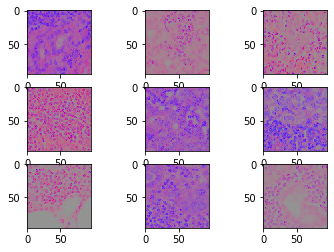

In [18]:
print(len(x_train))
print(type(x_train))
print(type(x_train[0]))
print(x_train[0].shape)
from matplotlib import pyplot
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape, Lambda, Input
from keras.regularizers import l2
import tensorflow as tf

In [0]:
full_size = 32 * 32 * 3
original_shape = (96, 96, 3)
new_shape = (32, 32)

In [10]:
model = Sequential([
    Lambda(lambda image: tf.image.resize(image, new_shape)),
    Reshape((1, 1, full_size,), input_shape=x_train[0].shape),
    Dense(int(full_size * 1.95)), Activation('sigmoid'),
    Dense(1),                  Activation('softmax'),
])
model.build((len(x_train), 96, 96, 3))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (10000, 32, 32, 3)        0         
_________________________________________________________________
reshape_1 (Reshape)          (10000, 1, 1, 3072)       0         
_________________________________________________________________
dense_1 (Dense)              (10000, 1, 1, 5990)       18407270  
_________________________________________________________________
activation_1 (Activation)    (10000, 1, 1, 5990)       0         
_________________________________________________________________
dense_2 (Dense)              (10000, 1, 1, 1)          5991      
_________________________________________________________________
activation_2 (Activation)    (10000, 1, 1, 1)          0         
Total params: 18,413,261
Trainable params: 18,413,261
Non-trainable params: 0
_______________________________________

In [11]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
model.fit(x_train, y_train, epochs=10, batch_size=10000, shuffle='batch', validation_data=(x_valid, y_valid), use_multiprocessing=True)




Train on 10000 samples, validate on 10000 samples
Epoch 1/10





10000/10000 [==============================] - 33s 3ms/step - loss: 7.9010 - acc: 0.5044 - val_loss: 7.9537 - val_acc: 0.5011
Epoch 2/10
10000/10000 [==============================] - 25s 2ms/step - loss: 7.9010 - acc: 0.5044 - val_loss: 7.9537 - val_acc: 0.5011
Epoch 3/10
10000/10000 [==============================] - 22s 2ms/step - loss: 7.9010 - acc: 0.5044 - val_loss: 7.9537 - val_acc: 0.5011
Epoch 4/10
10000/10000 [==============================] - 22s 2ms/step - loss: 7.9010 - acc: 0.5044 - val_loss: 7.9537 - val_acc: 0.5011
Epoch 5/10
10000/10000 [==============================] - 21s 2ms/step - loss: 7.9010 - acc: 0.5044 - val_loss: 7.9537 - val_acc: 0.5011
Epoch 6/10
10000/10000 [==============================] - 21s 2ms/step - loss: 7.9010 - acc: 0.5044 - val_loss: 7.9537 - val_acc: 0.5011
Epoch 7/10
10000/10000 [==============================] - 21s 2ms/step - loss: 7.9010 - acc: 0.5044 - val_loss: 7.9537 -

In [13]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy * 100))

InvalidArgumentError: ignored